In [258]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://coding-bootcamps.notion.site/Holiday-Mood-Tracker-2c46ed1efc938057be5fc3181d44f7f2

In [259]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [260]:
df = pd.read_csv('/content/drive/MyDrive/December Code Jam/Daylio_Abid.csv')

In [261]:
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


### Data Cleaning/ Preprocessing

In [262]:
#df['full_date'] = pd.to_datetime(df['full_date'], format='%d/%m/%Y')
df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )

not_needed_date_columns = ['full_date', 'time', 'date']
df.drop(columns=not_needed_date_columns, inplace=True)

/tmp/ipython-input-2562534138.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )


In [263]:
df.set_index('datetime', inplace=True)

df = df.sort_index(ascending=False)

In [264]:
print(df.index.is_monotonic_decreasing)

True


In [265]:
print(df.index.is_monotonic_increasing)

False


In [266]:
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,47
mood,0


In [267]:
df.shape

(940, 4)

In [268]:
df.dropna(inplace=True)

df.isna().sum()

,0
weekday,0
sub_mood,0
activities,0
mood,0


In [269]:
df.duplicated().sum()

np.int64(1)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 893 entries, 2021-12-04 21:52:00 to 2018-01-03 12:20:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weekday     893 non-null    object
 1   sub_mood    893 non-null    object
 2   activities  893 non-null    object
 3   mood        893 non-null    object
dtypes: object(4)
memory usage: 34.9+ KB


In [271]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,reading | learning | fasting | walk | medita...,Awful
2021-12-03 21:01:00,Friday,focused,reading | learning | prayer | fasting | walk...,Good
2021-12-02 21:10:00,Friday,worried,reading | learning | prayer | fasting | walk...,Bad
2021-12-01 21:46:00,Tuesday,Cool,learning | walk | streaming | youtube | cook...,Amazing
2021-11-04 00:21:00,Sunday,wondering,reading | learning | prayer | fasting | walk...,Normal


In [272]:
df['activities'] = df['activities'].str.split('|')

In [273]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


In [274]:
df.describe()

,weekday,sub_mood,activities,mood
count,893,893,893,893
unique,7,22,839,5
top,Tuesday,blessed,[Dota 2],Good
freq,131,169,10,470


In [372]:
mood_counts = df['mood'].value_counts()

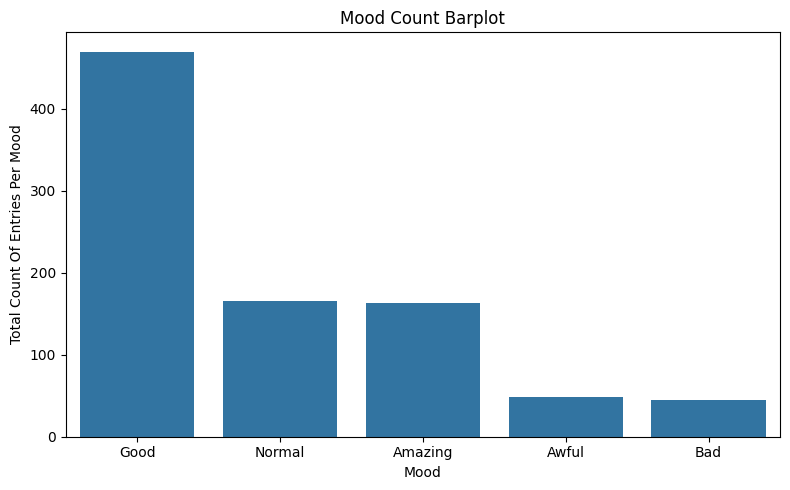

In [276]:
plt.figure(figsize=(8, 5))
plt.title('Mood Count Barplot')
plt.xlabel('Mood')
plt.ylabel('Total Count Of Entries Per Mood')
sns.barplot(data=mood_counts)
plt.savefig('mood_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [277]:
df_copy = df.copy()

In [278]:
mood_weekly_counts.columns

Index(['Amazing', 'Awful', 'Bad', 'Good', 'Normal'], dtype='object', name='mood')

In [279]:
mood_weekly_counts = df_copy.resample('W')['mood'].value_counts().unstack().fillna(0)

good_mood_weekly_counts = mood_weekly_counts[['Amazing', 'Good', 'Normal']]
good_smoothed = good_mood_weekly_counts.rolling(window=7, center=True).mean()

bad_mood_weekly_counts = mood_weekly_counts[['Bad', 'Awful']]
bad_smoothed = bad_mood_weekly_counts.rolling(window=7, center=True).mean()

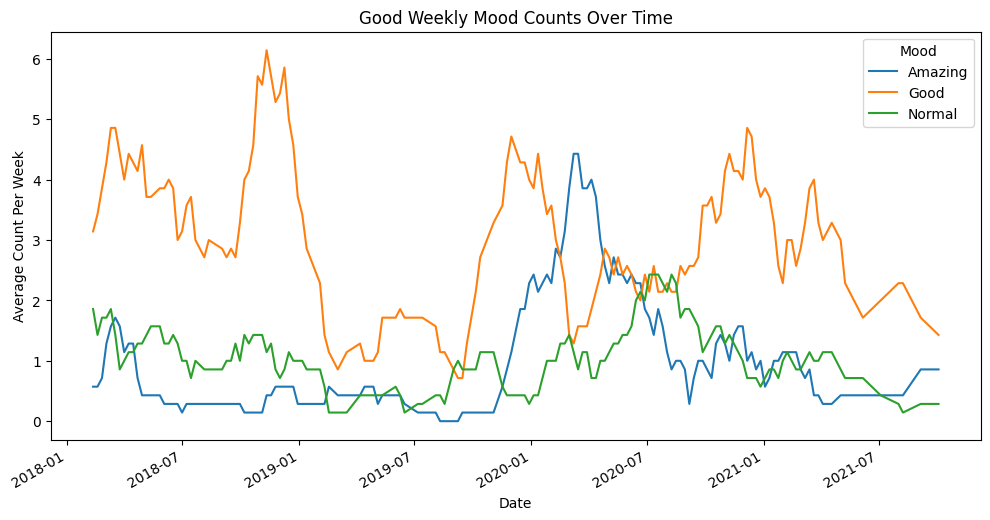

In [280]:
good_smoothed.plot(figsize=(12,6))
plt.title("Good Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('good_mood_linechart.png', dpi=300, bbox_inches='tight')
plt.show()


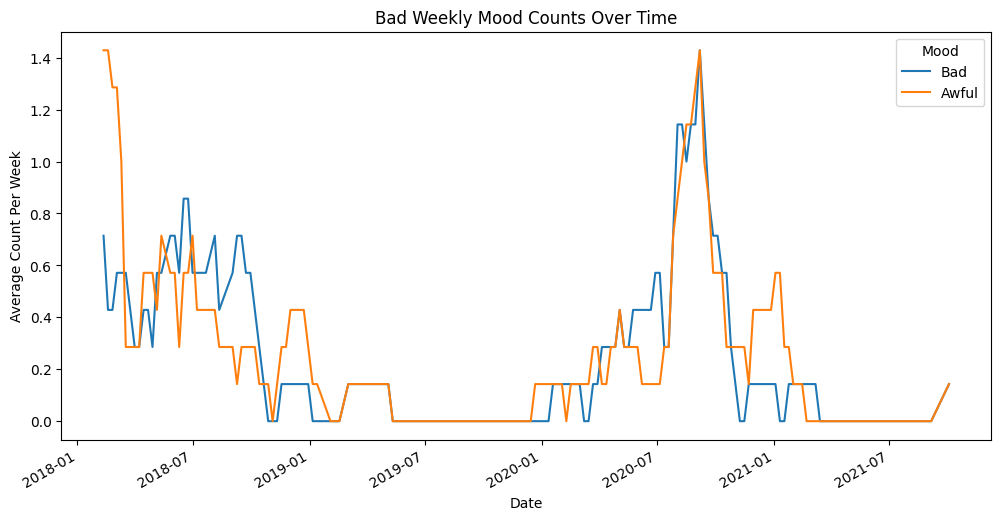

In [281]:
bad_smoothed.plot(figsize=(12,6))
plt.title("Bad Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('bad_mood_linecharts', dpi=300, bbox_inches='tight')
plt.show()


In [283]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


In [285]:
mood_map = {
    'Awful': 1,
    'Bad' : 2,
    'Normal' : 3,
    'Good' : 4,
    'Amazing' : 5
}

df['mood_encoded'] = df['mood'].map(mood_map)

In [288]:
mean_mood_score = df['mood_encoded'].mean()

print(f'Average Mood Score: {mean_mood_score:.2f}')

Average Mood Score: 3.73


In [295]:
most_common_mood = df['mood'].mode()

print(f"Most Common Mood Category: {most_common_mood[0]}")

Most Common Mood Category: Good


In [306]:
activities_explode_df = df.explode('activities')

activities_explode_df['activities'] = activities_explode_df['activities'].str.strip().str.lower()

activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [307]:
activities_explode_df['activities'].unique()

array(['reading', 'learning', 'fasting', 'walk', 'meditation', 'shower',
       'writing', 'watching series', 'good meal', 'reddit',
       'language learning', 'streaming', 'youtube', 'cooking', 'cleaning',
       'research', 'new things', 'power nap', 'documentary', 'penpal',
       'coding', 'tutorial', 'prayer', 'podcast', 'audio books', 'songs',
       'email', 'art', 'quran', 'love', 'news update', 'yoga', 'family',
       'repair', 'travel', 'exercise', 'shave', 'movies', 'holotropic',
       'designing', 'trimming', 'poetry', 'write dairy', 'jobs',
       'recording', 'party', 'dota 2', 'weight log', 'keto', 'shopping',
       'video editing', 'friends', 'kaballah', 'gaming', 'phd', 'hiking',
       'hospital'], dtype=object)

In [314]:
activities_sorted = activities_explode_df['activities'].value_counts()
activities_sorted = activities_sorted.sort_values(ascending=False)
top_10_activities = activities_sorted.head(10)

In [331]:
top_10_activities

,count
activities,
youtube,770
streaming,710
good meal,586
audio books,553
reddit,542
meditation,541
watching series,539
walk,521
news update,520


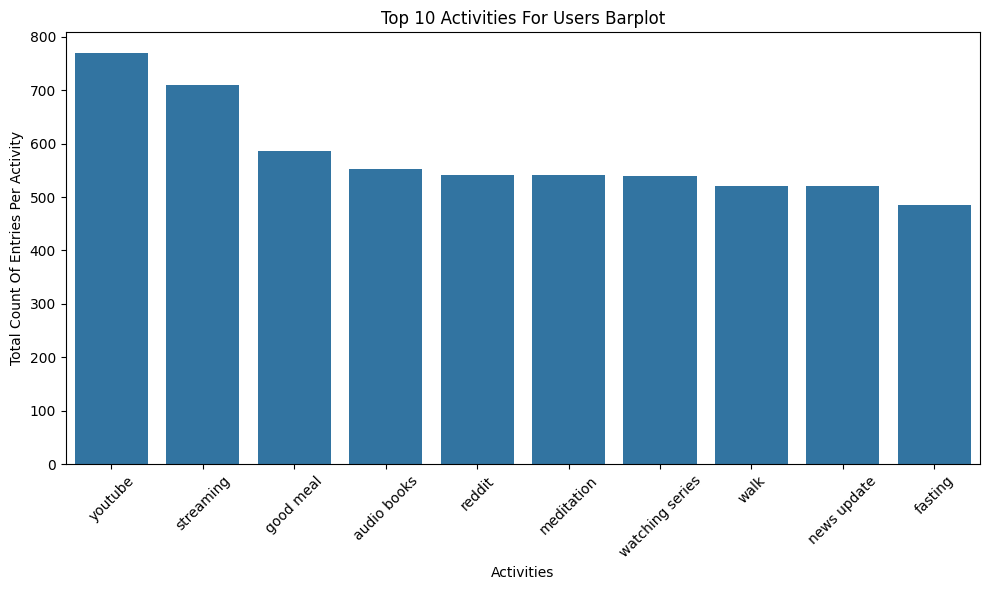

In [318]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Activities For Users Barplot')
plt.xlabel('Activities')
plt.ylabel('Total Count Of Entries Per Activity')
sns.barplot(data=top_10_activities)
plt.xticks(rotation=45)
plt.savefig('top_10_activities_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [321]:
activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [363]:
medium_freq_activities = activities_sorted[(activities_sorted >= 365) & (activities_sorted <= 405)]

medium_freq_activities.head(3)

,count
activities,
power nap,400
prayer,398
penpal,388


In [ ]:
activities_ascending_sorted = activities_sorted.sort_values(ascending=True)
bottom_5_activities = activities_ascending_sorted.head(5)

bottom_5_activities

,count
activities,
video editing,3
hiking,3
hospital,4
party,6
phd,7


In [364]:
activities_corr_list = [
    'youtube',
    'streaming',
    'good meal',
    'audio books',
    'reddit',
    'video editing',
    'hiking',
    'party',
    'phd',
    'power nap',
    'penpal'
    ]

activities_corr_df = activities_explode_df[activities_explode_df['activities'].isin(activities_corr_list)]
activities_encoded = pd.get_dummies(activities_corr_df['activities'], dtype=int)

activities_mood = pd.concat([activities_encoded, activities_corr_df['mood_encoded']], axis=1)

In [365]:
activities_corr = activities_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

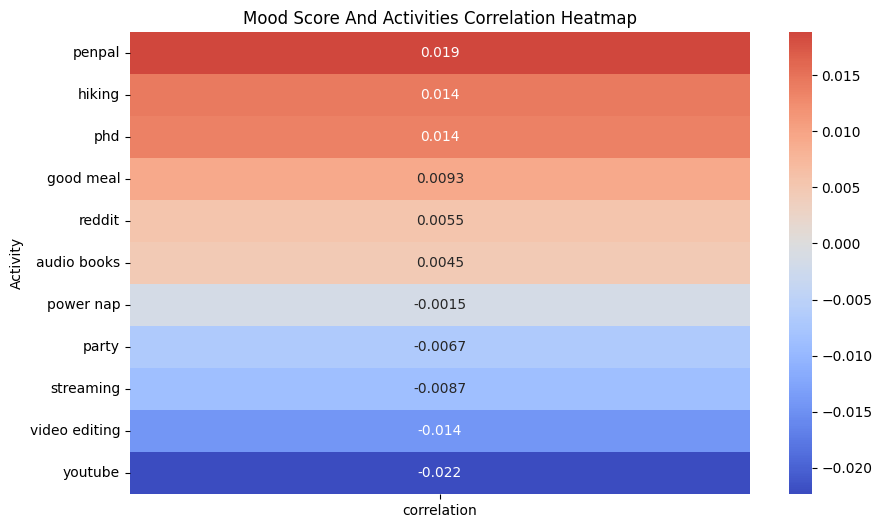

In [370]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)

plt.title('Mood Score And Activities Correlation Heatmap')
plt.ylabel("Activity")
plt.show()


In [373]:
df.columns

Index(['weekday', 'sub_mood', 'activities', 'mood', 'mood_encoded'], dtype='object')

In [388]:
df['week'] = df.index.to_period('W')

In [404]:
weekly_weekday_mood_avg = (
    df.groupby(['week', 'weekday'])['mood_encoded']
    .mean()
    .reset_index()
)

weekly_pivot_df = weekly_weekday_mood_avg.pivot(
    index='week',
    columns='weekday',
    values='mood_encoded'
)

weekly_pivot_df.index = weekly_pivot_df.index.to_timestamp()

weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
]
mon_thurs_list = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday'
    ]

weekly_pivot_df = weekly_pivot_df.reindex(columns=weekday_order)
mon_thurs_df = weekly_pivot_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday']].dropna(how='all')

<Axes: xlabel='week'>

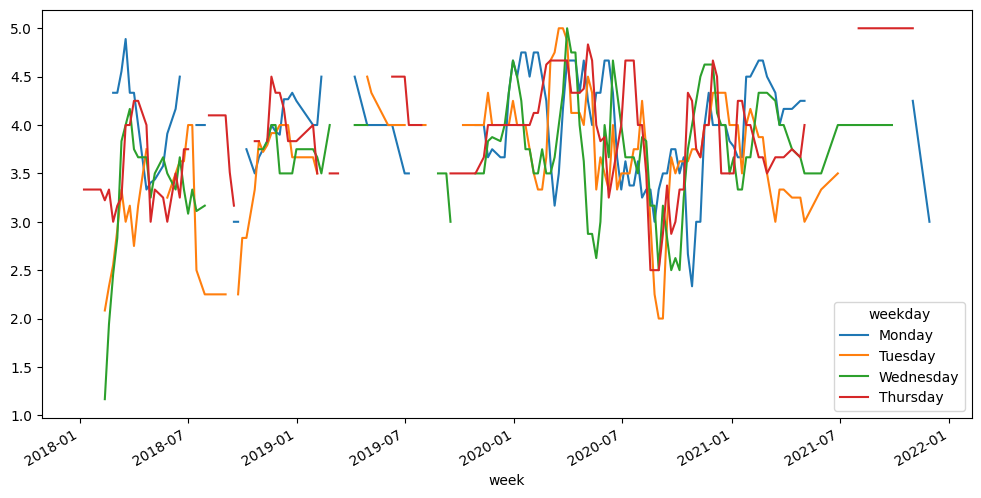

In [409]:
#this data is too messy probably not going to use this chart/
mon_thurs_smoothed = mon_thurs_df.sort_index().rolling(window=4, min_periods=2).mean()

plt.figure(figsize=(12, 6))
mon_thurs_smoothed.plot(ax=plt.gca())

In [410]:
def mood_alert(mood_score):
  if mood_score <= 2:
    print(f"I noticed you're having a rough day, have you tried anything to improve your mood?")

  if mood_score <= 3:
    print(f"I see you're in a good mood today.  Keep up the good work!")

  else:
    print(f"Not a valid entry")